In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import inception_resnet_v2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.utils import img_to_array, array_to_img
from google.colab.patches import cv2_imshow
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import collections
import ast
import glob
from IPython.display import Image

In [ ]:
base_path='/content/drive/MyDrive/Dataset/Dementia_data'

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Dataset/Dementia_data/ADNI_subjects.xlsx')
df

,PHASE,PTID,EXAMDATE,Gender,Birthdate,Age,FINAL_DX,AD severity,Certain or Not,CDR,Follow-up diagnosis
0,ADNI2,002_S_0295,2011-06-02,1,1921-06-01,90,normal cognition-NC,NaN,NaN,0.0,1.0
1,ADNI2,002_S_0295,2012-05-10,1,1921-06-01,91,normal cognition-NC,NaN,NaN,0.0,1.0
2,ADNI2,002_S_0413,2011-06-16,2,1929-12-01,82,normal cognition-NC,NaN,NaN,0.0,1.0
3,ADNI2,002_S_0413,2012-05-15,2,1929-12-01,83,normal cognition-NC,NaN,NaN,0.0,1.0
4,ADNI2,002_S_0413,2014-05-01,2,1929-12-01,84,normal cognition-NC,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6069,ADNI1,023_S_0078,2007-08-01,2,1929-12-01,78,Severe AD,3.0,3.0,3.0,NaN
6070,ADNI3,037_S_6216,2020-12-09,1,1934-07-01,87,Severe AD,3.0,NaN,3.0,NaN
6071,ADNI1,051_S_1131,2010-03-04,1,1920-07-01,90,MCI,NaN,4.0,NaN,NaN
6072,ADNI1,067_S_0607,2008-05-02,2,1928-05-01,80,MCI,NaN,4.0,NaN,NaN


In [ ]:
df = df.drop(['PHASE','AD severity','Certain or Not','CDR'], axis=1)
df

,PTID,EXAMDATE,Gender,Birthdate,Age,FINAL_DX,Follow-up diagnosis
0,002_S_0295,2011-06-02,1,1921-06-01,90,normal cognition-NC,1.0
1,002_S_0295,2012-05-10,1,1921-06-01,91,normal cognition-NC,1.0
2,002_S_0413,2011-06-16,2,1929-12-01,82,normal cognition-NC,1.0
3,002_S_0413,2012-05-15,2,1929-12-01,83,normal cognition-NC,1.0
4,002_S_0413,2014-05-01,2,1929-12-01,84,normal cognition-NC,1.0
...,...,...,...,...,...,...,...
6069,023_S_0078,2007-08-01,2,1929-12-01,78,Severe AD,NaN
6070,037_S_6216,2020-12-09,1,1934-07-01,87,Severe AD,NaN
6071,051_S_1131,2010-03-04,1,1920-07-01,90,MCI,NaN
6072,067_S_0607,2008-05-02,2,1928-05-01,80,MCI,NaN


In [ ]:
df[(df['PTID'] == '002_S_0295') & (df['EXAMDATE'] == '20110602')]

,PTID,EXAMDATE,Gender,Birthdate,Age,FINAL_DX,Follow-up diagnosis
0,002_S_0295,2011-06-02,1,1921-06-01,90,normal cognition-NC,1.0


In [ ]:
 #알집 해제
 #def open_zip(Data_path):
 #    os.chdir(Data_path)
 #    zip_files = os.listdir(Data_path)
 #    zip_files=[files for files in zip_files if '.zip' in files]
 #    for zip_file in zip_files:
 #        zipfile.ZipFile(os.path.join(Data_path,zip_file)).extractall()
 #    return os.listdir(Data_path)
 #data_listdir=open_zip(base_path)

In [ ]:

def fold_path(Data_path):
    fold = collections.defaultdict(list)
    os.chdir(Data_path)
    Data_list = os.listdir(Data_path)
    folder_list = [folder for folder in Data_list if os.path.isdir(os.path.join(Data_path, folder))]
    print(folder_list)
    for folder in folder_list:
        # print(folder)
        files_in_folder=os.listdir(os.path.join(Data_path,folder))
        # print(files_in_folder)
        fold[folder] = files_in_folder
        print(fold)
    return fold

fold_data = fold_path(base_path)


['Normal', 'Mild AD']
defaultdict(<class 'list'>, {'Normal': ['002_S_0295_110602', '002_S_0295_120510', '002_S_0413_110616', '002_S_0413_120515', '002_S_0413_130510', '002_S_0413_140501', '002_S_0413_150609', '002_S_0685_110708', '002_S_1261_110314', '002_S_1280_110504', '002_S_1280_120301', '002_S_1280_130226', '002_S_1280_140314', '002_S_1280_150504', '002_S_4213_110902', '002_S_4213_111205', '002_S_4213_120316', '002_S_4213_120919', '002_S_4213_130917', '002_S_4213_150929', '002_S_4225_110921', '002_S_4225_111226', '002_S_4225_120412', '002_S_4225_121011', '002_S_4225_131017', '002_S_4262_111005', '002_S_4262_120102', '002_S_4262_120419', '002_S_4262_121025', '002_S_4264_111005', '002_S_4270_111011', '002_S_4270_120110', '002_S_4270_120504', '002_S_4270_121114', '002_S_4270_131114', '002_S_5178_130516', '002_S_5178_130806', '002_S_5178_131205', '002_S_5178_150714', '002_S_5230_130627', '002_S_5230_130923', '002_S_5230_140124', '002_S_5230_151201', '002_S_5256_130715', '002_S_5256_14

In [ ]:
fold_data.keys()

dict_keys(['Normal', 'Mild AD'])

In [ ]:
data_list = []
data_dict = {}
for class_label, subject_folds_list in fold_data.items():
    for subject_folder in subject_folds_list:
        parts = subject_folder.split('_')
        #dtype str, str
        subject_id, examdate = '_'.join(parts[0:3]), '20'+parts[3]
        ########examdate에 중간바('-') 를 join 안 시켰는데 인식함.
        result_row = df[(df['PTID'] == subject_id) & (df['EXAMDATE'] == examdate)]
        # print(result_row['Gender'].values.shape)#(1,)
        # print(result_row['Gender'].values[0].shape)#() value값으로 받기 위해  dim 제거
        # if not result_row.empty:
        #     print(f"Class: {class_label}, Subject: {subject_folder}, Gender: {result_row['Gender'].values[0]}, Age: {result_row['Age'].values[0]},")
        image_dir=os.path.join(base_path, class_label,subject_folder)
        image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.png')]

            # 데이터를 딕셔너리에 저장
            ###### image_paths -> path, Image_Number 가 list형태로 들어갔는데 고침.
        data_dict = {
            'image_path': image_dir,
            'Gender': result_row['Gender'].values[0],
            'Age': result_row["Age"].values[0],
            'Image_Number': sorted([int(os.path.splitext(os.path.basename(path))[0].split('plane')[-1]) for path in image_paths]),
            'label': class_label
        }

            # 리스트에 딕셔너리 추가
        data_list.append(data_dict)
final_df = pd.DataFrame(data_list)


In [ ]:
final_df


,image_path,Gender,Age,Image_Number,label
0,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,90,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Normal
1,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,91,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Normal
2,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,82,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Normal
3,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,83,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Normal
4,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,83,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Normal
...,...,...,...,...,...
636,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,78,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Mild AD
637,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,88,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Mild AD
638,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,88,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Mild AD
639,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,79,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",Mild AD


In [ ]:
final_df['image_path'][0]


'/content/drive/MyDrive/Dataset/Dementia_data/Normal/002_S_0295_110602'

In [ ]:
## label2idx
final_df['label'] = final_df['label'].map({
    'Normal':0,
    'Mild AD' :1
})

In [ ]:
bins = [50, 60, 70, 80, 90, 100]
labels = ['50대', '60대', '70대', '80대', '90대']
final_df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
age_group_mapping = {'50대': 0, '60대': 1, '70대': 2, '80대': 3, '90대': 4}
final_df['Age_Group'] = final_df['Age_Group'].map(age_group_mapping)

In [ ]:
final_df.head()
final_df.to_csv('/content/drive/MyDrive/Dataset/Dementia_data/data_load_Age_Group.csv',index=False)

In [ ]:
# final_df = pd.read_csv('/content/drive/MyDrive/Dataset/Dementia_sample/data_load_Age_Group.csv')

In [ ]:
final_df

,image_path,Gender,Age,Image_Number,label,Age_Group
0,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,90,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,4
1,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,91,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,4
2,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,82,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3
3,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,83,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3
4,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,83,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3
...,...,...,...,...,...,...
636,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,78,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,3
637,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,88,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,3
638,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,88,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,3
639,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,79,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,3


In [ ]:

final_df = final_df.drop('Age', axis=1)
final_df.head()


,image_path,Gender,Image_Number,label,Age_Group
0,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,4
1,/content/drive/MyDrive/Dataset/Dementia_data/N...,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,4
2,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3
3,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3
4,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,3


In [ ]:

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   image_path    641 non-null    object  
 1   Gender        641 non-null    int64   
 2   Image_Number  641 non-null    object  
 3   label         641 non-null    int64   
 4   Age_Group     641 non-null    category
dtypes: category(1), int64(2), object(2)
memory usage: 21.0+ KB


In [ ]:
final_df['Gender'] = final_df['Gender'].astype('category')
final_df['label'] = final_df['label'].astype('int')
final_df['Age_Group'] = final_df['Age_Group'].astype('category')
final_df['Image_Number'] = final_df['Image_Number'].apply(lambda x: [int(num) for num in x])

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   image_path    641 non-null    object  
 1   Gender        641 non-null    category
 2   Image_Number  641 non-null    object  
 3   label         641 non-null    int64   
 4   Age_Group     641 non-null    category
dtypes: category(2), int64(1), object(2)
memory usage: 16.7+ KB


In [ ]:
use_colab = True
assert use_colab in [True, False]
is_train = True

In [ ]:
inception_res_model = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

219055592/219055592 [==============================] - 6s 0us/step


In [ ]:
############ k fold 화
from sklearn.model_selection import train_test_split

train_data,valid_data, train_labels,valid_labels = \
    train_test_split(final_df[['image_path','Gender','Age_Group','Image_Number']], final_df['label'], test_size=0.2, random_state=42)
train_data,test_data, train_labels,test_labels = \
    train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
"""
train_data, train_labels 0.6
valid_data, valid_labels 0.2
test_data, test_labels 0.2
"""
print(train_data.shape, valid_data.shape, test_data.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)


(409, 4) (129, 4) (103, 4)
(409,) (129,) (103,)


In [ ]:
print(train_data['Gender'])
# print(train_labels)

629    2
129    2
57     2
534    2
385    2
      ..
247    1
417    1
552    1
52     1
478    1
Name: Gender, Length: 409, dtype: category
Categories (2, int64): [1, 2]


In [ ]:
train_data.head(10)

,image_path,Gender,Age_Group,Image_Number
629,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
129,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
57,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
534,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
385,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
190,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
443,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
373,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
182,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
543,/content/drive/MyDrive/Dataset/Dementia_data/M...,2,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [ ]:
train_data['image_path']

629    /content/drive/MyDrive/Dataset/Dementia_data/M...
129    /content/drive/MyDrive/Dataset/Dementia_data/N...
57     /content/drive/MyDrive/Dataset/Dementia_data/N...
534    /content/drive/MyDrive/Dataset/Dementia_data/M...
385    /content/drive/MyDrive/Dataset/Dementia_data/M...
                             ...                        
247    /content/drive/MyDrive/Dataset/Dementia_data/N...
417    /content/drive/MyDrive/Dataset/Dementia_data/M...
552    /content/drive/MyDrive/Dataset/Dementia_data/M...
52     /content/drive/MyDrive/Dataset/Dementia_data/N...
478    /content/drive/MyDrive/Dataset/Dementia_data/M...
Name: image_path, Length: 409, dtype: object

In [ ]:
# #Generator
# # 이미지 데이터셋 생성 함수 정의
# def create_dataset(df, labels):
#     for index, row in df.iterrows():
#         # 이미지 폴더 경로
#         image_folder = row['image_path']

#         # 이미지 파일 경로 목록
#         image_paths = get_image_paths(image_folder)

#         # 이미지 번호 목록
#         image_numbers = row['Image_Number']

#         for image_number in image_numbers:
#             # 이미지 파일 경로
#             image_path = os.path.join(image_folder, f"plane{image_number}.png")
#             print(image_path)
#             # 이미지 파일 읽기 및 전처리
#             image = tf.io.read_file(image_path)
#             image = tf.image.decode_png(image, channels=3)  # 예시: PNG 이미지를 디코딩

#             # 레이블 가져오기
#             label = labels[index]
#             # print(type(label))
#             gender = row['Gender']
#             Age_Group = row['Age_Group']

#             # image=tf.convert_to_tensor(image, dtype=tf.float32)
#             # gender=tf.convert_to_tensor(gender, dtype=tf.int32)
#             # Age_Group=tf.convert_to_tensor(Age_Group, dtype=tf.int32)
#             # image_number=tf.convert_to_tensor(image_number, dtype=tf.int32)
#             # label=tf.convert_to_tensor(label, dtype=tf.int32)
#             # 다른 feature들과 함께 yield
#             yield (image, gender, Age_Group, image_number, label)

In [ ]:
# # TensorFlow Dataset generator생성
# train_dataset = tf.data.Dataset.from_generator(
#     create_dataset,
#     output_signature=(
#         tf.TensorSpec(shape=(None, None, 3), dtype=tf.float32),  # 이미지
#         tf.TensorSpec(shape=(), dtype=tf.int32),               # Gender
#         tf.TensorSpec(shape=(), dtype=tf.int32),               # Age_Group
#         tf.TensorSpec(shape=(), dtype=tf.int32),               # Image_Number
#         tf.TensorSpec(shape=(), dtype=tf.int32)                # label
#     ),
#     args=(train_data, train_labels)
# )

# train_dataset = train_dataset.shuffle(buffer_size=len(train_data)).batch(30).repeat()


In [ ]:
def get_image_paths(image_folder):
    return glob.glob(os.path.join(image_folder, "*.png"))

In [ ]:
def create_dataset_for_folder(data,labels):
    data_list =[]
    data_dict = {}
    for index, row in data.iterrows():
        image_dir = row['image_path']
        # image_paths = get_image_paths(image_dir)
        # print(image_paths) # list_len: 392
        labels = labels
        image_numbers = sorted(row['Image_Number'])
        # print(labels) #(392,)
        for image_number in image_numbers:

            data_dict ={
                'image_path' : str(os.path.join(image_dir, f"plane{image_number}.png")),
                'Gender' : row['Gender'],
                'Age_Group' : row['Age_Group'],
                'image_number' : image_number,
                'label' :labels[index]
            }
            # print(data_dict)
            data_list.append(data_dict)
    return pd.DataFrame(data_list)


In [ ]:
train_dataset = create_dataset_for_folder(train_data,train_labels)
train_dataset

test_dataset = create_dataset_for_folder(test_data,test_labels)
test_dataset

valid_dataset = create_dataset_for_folder(valid_data,valid_labels)
valid_dataset

,image_path,Gender,Age_Group,image_number,label
0,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,1,0,0
1,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,1,1,0
2,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,1,2,0
3,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,1,3,0
4,/content/drive/MyDrive/Dataset/Dementia_data/N...,2,1,4,0
...,...,...,...,...,...
3865,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,2,25,1
3866,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,2,26,1
3867,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,2,27,1
3868,/content/drive/MyDrive/Dataset/Dementia_data/M...,1,2,28,1


In [ ]:
train_dataset.iloc[0]

image_path      /content/drive/MyDrive/Dataset/Dementia_data/M...
Gender                                                          2
Age_Group                                                       2
image_number                                                    0
label                                                           1
Name: 0, dtype: object

In [ ]:
train_dataset['image_path']=train_dataset['image_path'].astype(str)
train_dataset.dtypes

image_path      object
Gender           int64
Age_Group        int64
image_number     int64
label            int64
dtype: object

In [ ]:
def preprocess_and_augment(image_path, gender,age_group, image_number,label, training = True):

    image = tf.io.read_file(image_path)
    print(image.shape)
    image = tf.image.decode_jpeg(image, channels=3)
    print(image.shape)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # 이미지 증강
    if training:
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    image = tf.image.resize(image, [299, 299])
    gender = tf.cast(gender, tf.int64)
    age_group = tf.cast(age_group, tf.int64)
    image_number = tf.cast(image_number, tf.int64)
    label = tf.cast(label, np.int64)
    return image, (gender,age_group,image_number), label

In [ ]:
# ### 오류 통째로 넣었을떄
# # 오류발생 코드 1
# train_dataset_tensor = tf.data.Dataset.from_tensor_slices((train_dataset.iloc[:,0:3]))
# # train_dataset_tensor = train_dataset_tensor.map(preprocess_and_augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# train_dataset_tensor = train_dataset_tensor.cache().batch(30)
# train_dataset_tensor

In [ ]:
train_dataset_tensor = tf.data.Dataset.from_tensor_slices((train_dataset['image_path'].values,train_dataset['Gender'].values,train_dataset['Age_Group'].values, train_dataset['image_number'].values,train_dataset['label'].values))
train_dataset_tensor = train_dataset_tensor.map(preprocess_and_augment,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset_tensor = train_dataset_tensor.cache().batch(30).prefetch(tf.data.experimental.AUTOTUNE)
train_dataset_tensor

()
(None, None, 3)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
valid_dataset_tensor = tf.data.Dataset.from_tensor_slices((valid_dataset['image_path'].values,valid_dataset['Gender'].values,valid_dataset['Age_Group'].values, valid_dataset['image_number'].values,valid_dataset['label'].values))
valid_dataset_tensor = valid_dataset_tensor.map(lambda x1, x2, x3, x4, y: preprocess_and_augment(x1, x2, x3, x4, y, training=False) , num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_dataset_tensor = valid_dataset_tensor.cache().batch(batch_size=30).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset_tensor

()
(None, None, 3)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_dataset_tensor = tf.data.Dataset.from_tensor_slices((test_dataset['image_path'].values,test_dataset['Gender'].values,test_dataset['Age_Group'].values, test_dataset['image_number'].values,test_dataset['label'].values))
test_dataset_tensor = test_dataset_tensor.map(lambda x1, x2, x3, x4, y: preprocess_and_augment(x1, x2, x3, x4, y, training=False) , num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset_tensor = test_dataset_tensor.cache().batch(batch_size=30).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset_tensor

()
(None, None, 3)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
##### functional api
# inception_res_partial = models.Model(inputs=inception_res_model.input, outputs=inception_res_model.output)

# input = tf.keras.layers.Input(shape=(299, 299, 3))

# x = inception_res_partial(input)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(1024, activation='relu')(x)


# dig_data_input = tf.keras.layers.Input(shape=(3,))
# dig_data = tf.keras.layers.Dense(3, activation='relu')(dig_data_input)
# x = tf.keras.layers.Concatenate(axis=-1)([x,dig_data])
# x = tf.keras.layers.Dense(1027, activation='relu')(x)
# x = tf.keras.layers.Dense(3, activation='softmax')(x)

# dig_model = tf.keras.models.Model(inputs=[input,dig_data_input], outputs=x)

# dig_model.summary()


In [ ]:
# baseline
# class pretrained_model(tf.keras.Model):
#     def __init__(self):
#         super(pretrained_model, self).__init__()
#         self.inception_res_model = tf.keras.applications.InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(299, 299, 3))
#         self.inception_res_partial = models.Model(inputs=self.inception_res_model.input, outputs=self.inception_res_model.output)
#         self.global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()
#         self.dense1 = tf.keras.layers.Dense(1024, activation='relu')
#     def call(self, input):

#         x = self.inception_res_partial(input)
#         x = self.global_average_pooling(x)
#         x = self.dense1(x)
#         return x
# class dignose_model(tf.keras.Model):
#     def __init__(self):
#         super(dignose_model, self).__init__()
#         #### 특정 feature 가중치 ---> 젊은이에게 부정적 가중치
#         ###### loss를 customize 해보자
#         self.concat_layer = tf.keras.layers.Concatenate(axis=-1)
#         self.reshape_layer = tf.keras.layers.Reshape((1,))  # 각 입력을 열 벡터로 변환하는 레이어 추가
#         self.dense1 = tf.keras.layers.Dense(3, activation='relu')

#     def call(self, inputs):
#         gender, age_group, image_number = inputs
#         # 각 입력을 열 벡터로 변환
#         gender = self.reshape_layer(gender)
#         age_group = self.reshape_layer(age_group)
#         image_number = self.reshape_layer(image_number)

#         x = self.concat_layer([gender, age_group, image_number])
#         x = self.dense1(x)
#         return x
# class concat_model(tf.keras.Model):
#     def __init__(self):
#         super(concat_model, self).__init__()
#         self.pretrained_model = pretrained_model()
#         self.dignose_model = dignose_model()
#         self.concat = tf.keras.layers.Concatenate(axis=-1)
#         self.dense1 = tf.keras.layers.Dense(1027, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(2, activation='softmax')


#     def call(self, inputs):
#         img, diagnose= inputs
#         img = self.pretrained_model(img)
#         # print(img.shape)
#         diagno = self.dignose_model(diagnose)
#         # print(diagno.shape)
#         x = self.concat((img,diagno))
#         x = self.dense1(x)
#         x = self.dense2(x)
#         return x

In [ ]:
class pretrained_model(tf.keras.Model):
    def __init__(self):
        super(pretrained_model, self).__init__()
        self.inception_res_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(299, 299, 3))
        self.inception_res_partial = models.Model(inputs=self.inception_res_model.input, outputs=self.inception_res_model.layers[-2].output)
        self.global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.batch_norm = tf.keras.layers.BatchNormalization()  # Batch Normalization 추가

    def call(self, input):
        x = self.inception_res_partial(input)
        x = self.global_average_pooling(x)
        x = self.batch_norm(x)  # Batch Normalization 적용
        x = self.dropout(x)
        return x

In [ ]:
class dignose_model(tf.keras.Model):
    def __init__(self):
        super(dignose_model, self).__init__()
        self.concat_layer = tf.keras.layers.Concatenate(axis=-1)
        self.reshape_layer = tf.keras.layers.Reshape((1,))
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')  # 더 큰 Dense 레이어
        self.batch_norm = tf.keras.layers.BatchNormalization()  # Batch Normalization 추가

    def call(self, inputs):
        gender, age_group, image_number = inputs
        gender = self.reshape_layer(gender)
        age_group = self.reshape_layer(age_group)
        image_number = self.reshape_layer(image_number)

        x = self.concat_layer([gender, age_group, image_number])
        x = self.dense1(x)
        x = self.batch_norm(x)  # Batch Normalization 적용
        return x

In [ ]:
class concat_model(tf.keras.Model):
    def __init__(self):
        super(concat_model, self).__init__()
        self.pretrained_model = pretrained_model()
        self.dignose_model = dignose_model()
        self.concat = tf.keras.layers.Concatenate(axis=-1)
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(128, activation='relu')  # 더 깊은 Dense 레이어
        self.output_layer = tf.keras.layers.Dense(2, activation='softmax')

    def call(self, inputs):
        img, diagnose = inputs
        img = self.pretrained_model(img)
        diagno = self.dignose_model(diagnose)
        x = self.concat((img, diagno))
        x = self.dense1(x)
        x = self.dense2(x)
        output = self.output_layer(x)
        return output

In [ ]:
model = concat_model()
#model_2 = pretrained_model()

In [ ]:
for data, diagnose, labels in train_dataset_tensor.take(1):
    print(data.shape)
    print(diagnose[0].shape)
    print(diagnose[1].shape)
    print(diagnose[2].shape)
    print(labels.shape)


(30, 299, 299, 3)
(30,)
(30,)
(30,)
(30,)
<_TakeDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
# for data, diagnose, labels in train_dataset_tensor.take(1):
#     model([data,diagnose])

# for data, lables in train_dataset_tensor.take(1):


In [ ]:
model.summary()
model.pretrained_model.summary()

Model: "concat_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pretrained_model (pretrain  multiple                  54342880  
 ed_model)                                                       
                                                                 
 dignose_model (dignose_mod  multiple                  1024      
 el)                                                             
                                                                 
 concatenate_1 (Concatenate  multiple                  0         
 )                                                               
                                                                 
 dense_1 (Dense)             multiple                  426240    
                                                                 
 dense_2 (Dense)             multiple                  32896     
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # 1e-3 ->1e-4

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
if use_colab:
    checkpoint_dir ='/content/drive/MyDrive/Dataset/Dementia_data'
    if not os.path.isdir(checkpoint_dir):
        os.makedirs(checkpoint_dir)
else:
    checkpoint_dir = '/content/drive/MyDrive/Dataset/Dementia_data'

In [ ]:
if not tf.io.gfile.exists(checkpoint_dir):
    tf.io.gfile.makedirs(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

if is_train:
    checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                   model=model)
else:
    checkpoint = tf.train.Checkpoint(model=model)

In [ ]:
# EarlyStopping 콜백 정의
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    min_delta=0.0001,  # 개선이 더 이상 없다고 판단할 최소 변화
    patience=10,  # 지정된 에폭 수동안 개선이 없을 때 학습 중단
)

In [ ]:
def compute_loss(labels, predictions):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, predictions)

In [ ]:
num_epochs = 3

In [ ]:
# save loss values for plot
loss_history = []
global_step = 0 # step 수 정의 (선택)
print_steps = 10 # tf.gradient_tape
save_epochs = 1 # tf.gradient_tape

# 에폭 반복
for epoch in range(num_epochs):
    print("\nStart of epoch %d" % (epoch+1,))

    # 한 에폭당 평균 손실 초기화
    epoch_train_loss_avg = tf.keras.metrics.Mean()
    # validation 데이터셋에서 정확도를 평가하기 위한 지표 초기화
    val_accuracy = tf.keras.metrics.Accuracy()

    # 데이터셋 스텝 반복
    for step, (data, diagnose, labels) in enumerate(train_dataset_tensor):
        with tf.GradientTape() as tape:

            # 모델 호출
            predictions = model([data, diagnose], training=True)

            # 손실 계산
            loss = compute_loss(labels, predictions)

        # 기울기 계산
        gradients = tape.gradient(loss, model.trainable_variables)
        # 기울기를 적용하여 가중치 업데이트
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # 손실 기록
        loss_history.append([epoch,loss])
        # 훈련 손실 기록
        epoch_train_loss_avg.update_state(loss)

        # 1스텝마다 평균 훈련 손실 출력
        mean_train_loss = epoch_train_loss_avg.result()
        print("Step {:03d}: Train Loss: {:.3f}".format(step+1, mean_train_loss))

    # validation 데이터셋을 사용하여 모델 평가
    validation_losses = []
    for data, diagnose, labels in valid_dataset_tensor:
        predictions = model([data, diagnose], training=False)
        validation_loss = compute_loss(labels, predictions)
        validation_losses.append(validation_loss.numpy())

        val_accuracy.update_state(labels, tf.argmax(predictions, axis=1))

    # 검증 손실 및 정확도 출력
    mean_validation_loss = np.mean(validation_losses)
    print("Epoch {}: Train Loss {:.3f}, Validation Loss {:.3f}".format(epoch+1, mean_train_loss, mean_validation_loss))
    print("Validation Accuracy: {:.3f}".format(val_accuracy.result()))

    if (epoch+1) % save_epochs == 0:
        checkpoint.save(checkpoint_prefix)


Start of epoch 1


Step 001: Train Loss: 1.008
Step 002: Train Loss: 1.006
Step 003: Train Loss: 0.948
Step 004: Train Loss: 0.977
Step 005: Train Loss: 0.960
Step 006: Train Loss: 1.006
Step 007: Train Loss: 0.978
Step 008: Train Loss: 0.962
Step 009: Train Loss: 0.960
Step 010: Train Loss: 0.936
Step 011: Train Loss: 0.987
Step 012: Train Loss: 0.979
Step 013: Train Loss: 0.987
Step 014: Train Loss: 1.002
Step 015: Train Loss: 1.003
Step 016: Train Loss: 0.994
Step 017: Train Loss: 0.995
Step 018: Train Loss: 0.999
Step 019: Train Loss: 0.992
Step 020: Train Loss: 0.978
Step 021: Train Loss: 0.981
Step 022: Train Loss: 0.988
Step 023: Train Loss: 0.971
Step 024: Train Loss: 0.972
Step 025: Train Loss: 0.965
Step 026: Train Loss: 0.960
Step 027: Train Loss: 0.959
Step 028: Train Loss: 0.968
Step 029: Train Loss: 0.960
Step 030: Train Loss: 0.950
Step 031: Train Loss: 0.944
Step 032: Train Loss: 0.944
Step 033: Train Loss: 0.941
Step 034: Train Loss: 0.934
Step 035: Train Loss: 0.930
Step 036: Train Loss

In [ ]:
loss_history = np.asarray(loss_history)
plt.figure(figsize=(4, 4))
plt.plot(loss_history[:,0], loss_history[:,1])
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1227, 2) + inhomogeneous part.

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

test_losses = []

for data, diagnose, labels in valid_dataset_tensor:
    predictions = model([data, diagnose], training=False)
    test_loss = compute_loss(labels, predictions)
    test_losses.append(validation_loss.numpy())

mean_test_loss = np.mean(test_losses)
print("loss: {}".format(mean_test_loss))

loss: 0.7043074369430542


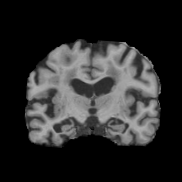

In [ ]:
# 여기서부터 그래드캠
# https://www.youtube.com/watch?v=iZJlwwzb7KQ&t=858s
# https://keras.io/examples/vision/grad_cam/
# 위에 두 링크 참고해서, Xception을 inception_resnet_v2로 고쳐서 돌려봤고,
# 오류가 없어서 영환님 코드에 그대로 적용시키는 중이었습니다.

img_size=(299,299,3)
preprocess_input=keras.applications.inception_resnet_v2.preprocess_input
decode_predictions=keras.applications.inception_resnet_v2.decode_predictions

# 이거도 처음에는 pretrained_model을 적으라는건가 싶어서 "pretrained_model"이걸 그대로 작성 했었는데,
# chatgpt한테 물어보니 Inception_resnet_v2의 마지막 레이어는 보통 "conv_7b_ac"로 되어 있다고 해서 그대로 바꿨습니다!
last_conv_layer_name='model'

img_path="/content/drive/MyDrive/Dataset/Dementia_data/Mild AD/003_S_1074_170922/plane18.png"

#img_path=keras.utils.get_file(
#    "cat.jpg", "https://www.fitpetmall.com/wp-content/uploads/2023/10/230420-0668-1.png"
#)

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model_2 = model.pretrained_model

# Remove last layer's softmax
#model_2.layers[-1].activation = None

# Print what the top predicted class is
preds = model_2.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model_2, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Model: "pretrained_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 model (Functional)          (None, 8, 8, 1536)        54336736  
                                                                 
 global_average_pooling2d (  multiple                  0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 batch_normalization_406 (B  multiple                  6144      
 atchNormalization)                                              
                                                  

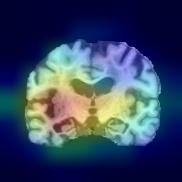

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
# # 그래드캠 1
# weights = model.layers[-1].get_weights()[0]
# model2 = tf.keras.models.Model(inputs=model.input, outputs=[model.layers[172].output, model.output])

# plt.figure(figsize=(299, 299))
# for i in range(20):
#     img = cv2.imread('/content/gdrive/My Drive/dataset/test/cat/cat.%d.jpg'%(i))
#     img = cv2.resize(img, (299,299))
#     x = img.copy()
#     x.astype(np.float32)
#     x = x / 255.0

#     [base_model_outputs, prediction] = model2.predict(np.expand_dims(x, axis=0))
#     prediction = prediction[0]
#     base_model_outputs = base_model_outputs[0]
#     plt.subplot(4, 5, i+1)
#     if prediction < 0.5:
#         plt.title('cat %.2f%%' % (100 - prediction*100))
#     else:
#         plt.title('dog %.2f%%' % (prediction*100))

#     cam = (prediction - 0.5) * np.matmul(base_model_outputs, weights)
#     cam -= cam.min()
#     cam /= cam.max()
#     cam -= 0.2
#     cam /= 0.8

#     cam = cv2.resize(cam, (224, 224))
#     heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
#     heatmap[np.where(cam <= 0.2)] = 0

#     out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)
#     plt.axis('off')
#     plt.imshow(out[:,:,::-1])

In [ ]:
#그래드캠 2
# def target_category_loss(x, category_index, nb_classes):
#     return tf.multiply(x, K.one_hot([category_index], nb_classes))

# def target_category_loss_output_shape(input_shape):
#     return input_shape

# def normalize(x):
#     # utility function to normalize a tensor by its L2 norm
#     return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

# def load_image(path):
#     img_path = train_dataset['image_path']
#     img = image.load_img(img_path, target_size=(299, 299))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = tf.keras.applications.InceptionResNetV2.preprocess_input(x)
#     return x

# def register_gradient():
#     if "GuidedBackProp" not in ops._gradient_registry._registry:
#         @ops.RegisterGradient("GuidedBackProp")
#         def _GuidedBackProp(op, grad):
#             dtype = op.inputs[0].dtype
#             return grad * tf.cast(grad > 0., dtype) * \
#                 tf.cast(op.inputs[0] > 0., dtype)

# def compile_saliency_function(model, activation_layer='block5_conv3'):
#     input_img = model.input
#     layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
#     layer_output = layer_dict[activation_layer].output
#     max_output = K.max(layer_output, axis=3)
#     saliency = K.gradients(K.sum(max_output), input_img)[0]
#     return K.function([input_img, K.learning_phase()], [saliency])

# def modify_backprop(model, name):
#     g = tf.get_default_graph()
#     with g.gradient_override_map({'Relu': name}):

#         # get layers that have an activation
#         layer_dict = [layer for layer in model.layers[1:]
#                       if hasattr(layer, 'activation')]

#         # replace relu activation
#         for layer in layer_dict:
#             if layer.activation == keras.activations.relu:
#                 layer.activation = tf.nn.relu

#         # re-instanciate a new model
#         new_model = VGG16(weights='imagenet')
#     return new_model

# def deprocess_image(x):
#     '''
#     Same normalization as in:
#     https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
#     '''
#     if np.ndim(x) > 3:
#         x = np.squeeze(x)
#     # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

#     # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     if K.image_dim_ordering() == 'th':
#         x = x.transpose((1, 2, 0))
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# def grad_cam(input_model, image, category_index, layer_name):
#     model = Sequential()
#     model.add(input_model)

#     nb_classes = 1000
#     target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
#     model.add(Lambda(target_layer,
#                      output_shape = target_category_loss_output_shape))

#     loss = K.sum(model.layers[-1].output)
#     conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
#     grads = normalize(K.gradients(loss, conv_output)[0])
#     gradient_function = K.function([model.layers[0].input], [conv_output, grads])

#     output, grads_val = gradient_function([image])
#     output, grads_val = output[0, :], grads_val[0, :, :, :]

#     weights = np.mean(grads_val, axis = (0, 1))
#     cam = np.ones(output.shape[0 : 2], dtype = np.float32)

#     for i, w in enumerate(weights):
#         cam += w * output[:, :, i]

#     cam = cv2.resize(cam, (224, 224))
#     cam = np.maximum(cam, 0)
#     heatmap = cam / np.max(cam)

#     #Return to BGR [0..255] from the preprocessed image
#     image = image[0, :]
#     image -= np.min(image)
#     image = np.minimum(image, 255)

#     cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
#     cam = np.float32(cam) + np.float32(image)
#     cam = 255 * cam / np.max(cam)
#     return np.uint8(cam), heatmap
# preprocessed_input = load_image(sys.argv[1])

# predictions = model.predict(preprocessed_input)
# top_1 = tf.keras.applications.InceptionResNetV2.decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

# predicted_class = np.argmax(predictions)
# cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, "block5_conv3")
# cv2.imwrite("gradcam.jpg", cam)

# register_gradient()
# guided_model = modify_backprop(model, 'GuidedBackProp')
# saliency_fn = compile_saliency_function(guided_model)
# saliency = saliency_fn([preprocessed_input, 0])
# gradcam = saliency[0] * heatmap[..., np.newaxis]
# cv2.imwrite("guided_gradcam.jpg", deprocess_image(gradcam))